## Training the Convolutional Neural Network
### Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2 
from sklearn.datasets import fetch_openml

### Fetch the data

In [2]:
mnist=fetch_openml('mnist_784',version=1)
X,y=mnist['data'],mnist['target']

In [3]:
X_new=list()
for vector in X:
    img=vector.reshape(28,28)
    _,img=cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)
    X_new.append(img)
X_new=np.array(X_new)

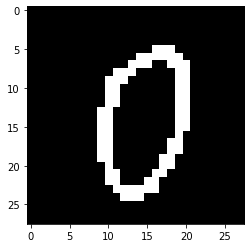

In [15]:
plt.imshow(X_new[1000],cmap='binary')

In [4]:
y=y.astype(np.uint8)
X_train,X_test,y_train,y_test=X_new[:60000],X_new[60000:],y[:60000],y[60000:]

In [5]:
X_train=X_train/255.
X_test=X_test/255.

### Architecture

In [11]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64,7,activation='relu',padding='same',input_shape=[28,28,1]))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(128,3,activation='relu',padding='same'))
model.add(keras.layers.Conv2D(128,3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(256,3,activation='relu',padding='same'))
model.add(keras.layers.Conv2D(256,3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))

In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=0.001),metrics='accuracy')

### Training for 10 epochs

In [13]:
history=model.fit(np.expand_dims(X_train,axis=-1),y_train,epochs=10)#,initial_epoch)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.9978 - accuracy: 0.6467
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1446 - accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1068 - accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0856 - accuracy: 0.9787
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0744 - accuracy: 0.9827
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0615 - accuracy: 0.9858
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0576 - accuracy: 0.9860
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0506 - accuracy: 0.9879
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0565 - accuracy: 0.9875
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

In [14]:
model.evaluate(np.expand_dims(X_test,axis=-1),y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0606 - accuracy: 0.9878


[0.06062845513224602, 0.9878000020980835]

In [19]:
model.save_weights('Captcha Solver.h5')